# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics





## Exploratory Data Analysis 

In [69]:
df = pd.read_csv("data/Advertising.csv", index_col=0)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [71]:
df = df.rename(columns={"newpaper": "newspaper"})

In [72]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [73]:
df['newspaper'] = df['newspaper'].str.replace("s", "").astype(float)
df["sales"] = df["sales"].round(2)

In [74]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


In [75]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


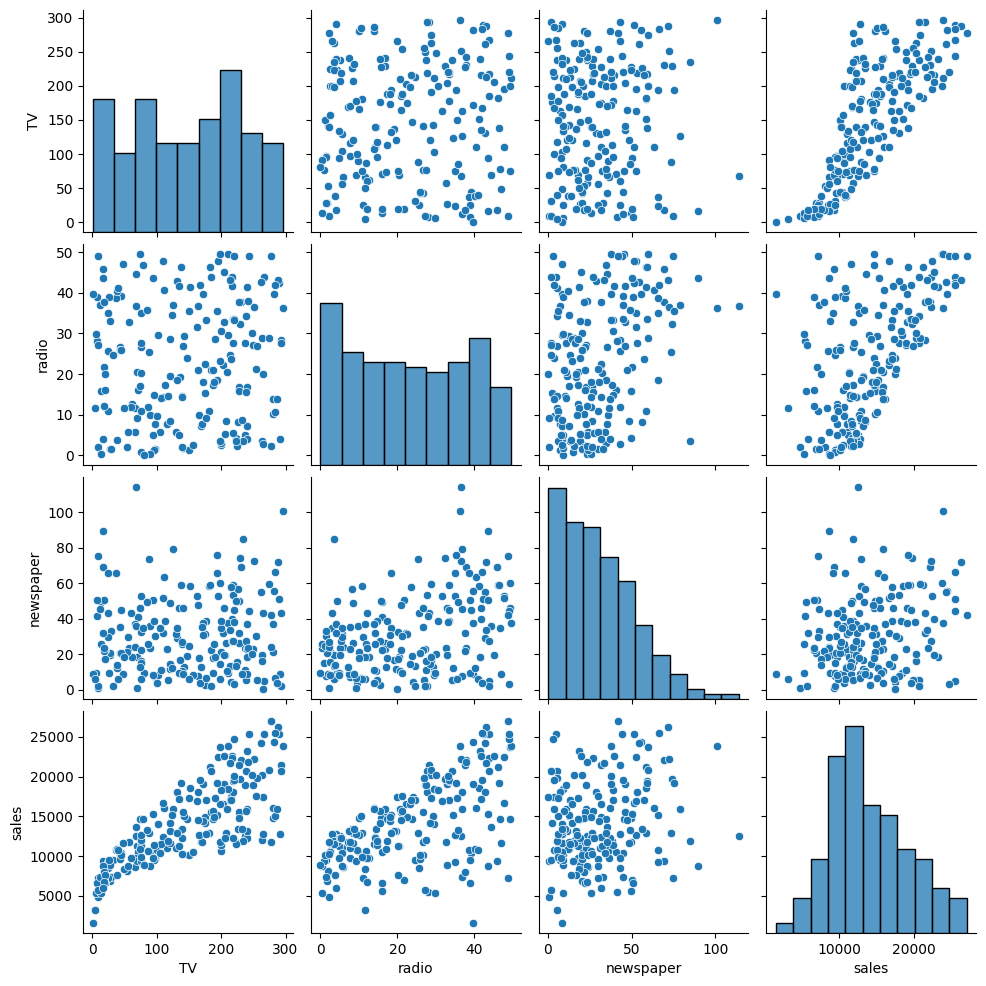

In [85]:
sns.pairplot(df)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## Modelado

In [77]:
X = df[["TV", "radio", "newspaper"]]   
y = df["sales"]                        

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)

In [79]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (200, 3)
Train features shape: (160, 3)
Train target shape: (160,)
Test features shape: (40, 3)
Test target shape: (40,)


In [80]:
# Entrenar modelo regresión lineal baseline
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predicciones
pred = lm.predict(X_test)

print("Train MAE:", metrics.mean_absolute_error(y_test, pred))
print("Test MSE:", metrics.mean_squared_error(y_test, pred))
print("Train RMSE:", metrics.root_mean_squared_error(y_test, pred))
print("Test MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

Train MAE: 1610.6841101464008
Test MSE: 5177879.61547337
Train RMSE: 2275.4954659311825
Test MAPE: 0.26969730492520483


In [81]:
y_pred=lin_reg.predict(X_test)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred_test))

Train MSE: 2263568.846153605
Test MSE: 5177879.61547337


## NORMALIZACIÓN

In [82]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
ridgeR = Ridge(alpha = 40)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

NameError: name 'lr' is not defined

In [ ]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 
print(np.min(alphas))
print(np.max(alphas))

0.0001
1000.0


In [ ]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    # coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [ ]:
min(err_ridge)

5177881.867307964

In [ ]:
np.array(err_ridge).argmin()

np.int64(0)

In [ ]:
alphas[np.array(err_ridge).argmin()]

np.float64(0.0001)

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\mikel\AppData\Local\Temp\ipykernel_14684\1187573374.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=20)


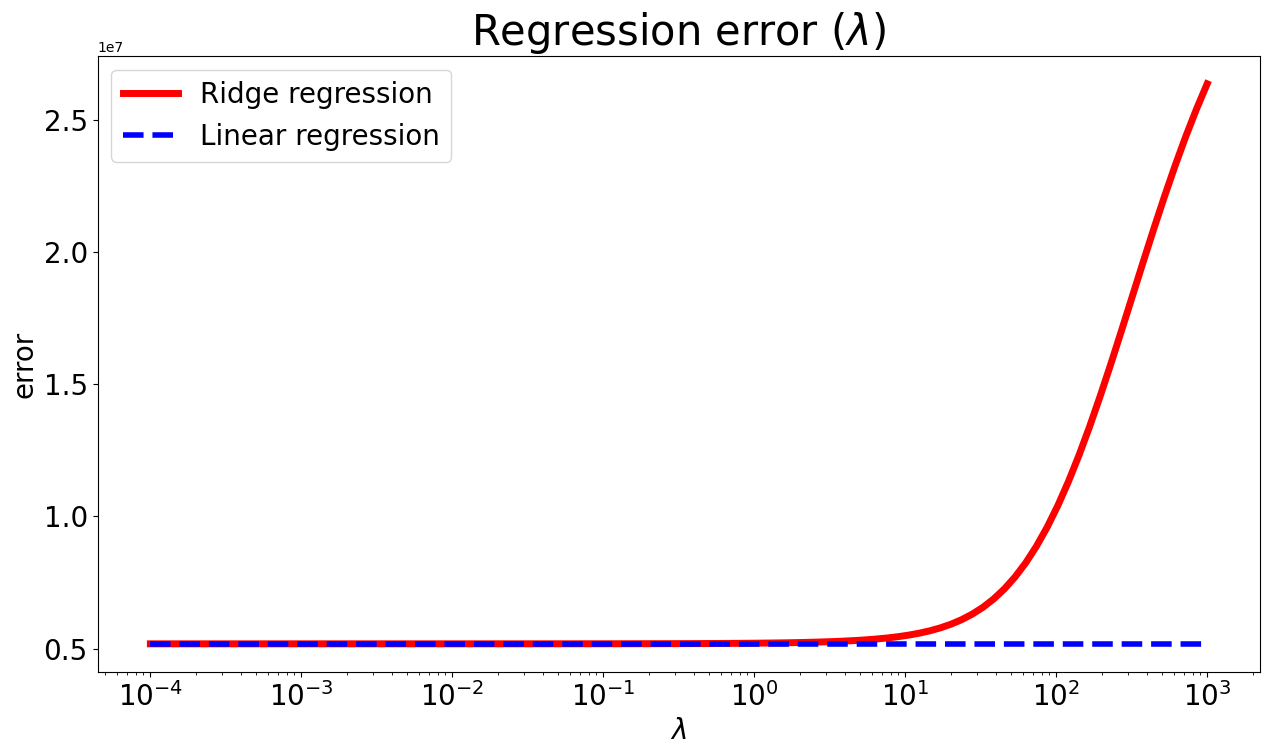

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('error', fontsize=20)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [ ]:
# Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

NameError: name 'Lasso' is not defined

In [ ]:
lasso = linear_model.Lasso(fit_intercept=False)

coef_lasso = []
err_lasso = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\mikel\AppData\Local\Temp\ipykernel_16112\622328189.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=30)
C:\Users\mikel\AppData\Local\Temp\ipykernel_16112\622328189.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=30)


NameError: name 'alphas' is not defined

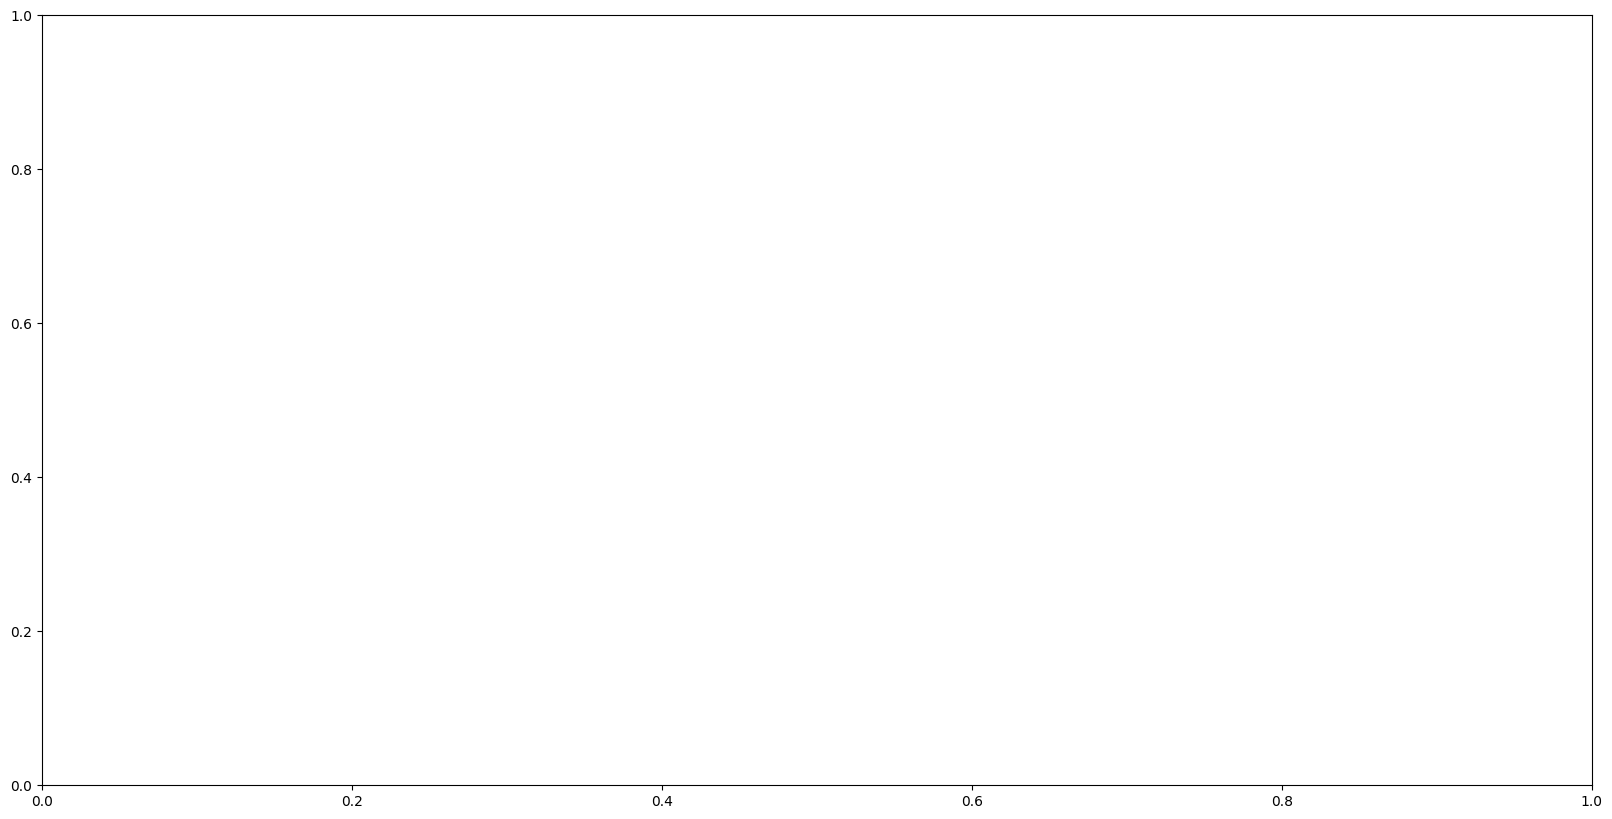

In [84]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

NameError: name 'lr' is not defined